# K-Nearest Neighbors (KNN)

K-Nearest Neighbors (KNN) is a versatile machine learning algorithm that is easy to understand and can be used for both classification (categorizing objects) and regression (predicting a continuous value). It doesn't assume any specific structure for the data, which makes it useful in real-world scenarios where data doesn't follow theoretical models.

### Understanding KNN

KNN operates on a simple principle: it predicts the outcome for new data points by looking at the closest data points from the training set. "Closest" is determined based on a distance metric. The simplicity of KNN comes from its direct approach: it doesn’t build a model but makes predictions using the real dataset.

### KNN Algorithm

The KNN algorithm involves several key steps:

Step 1: Choosing k
- k represents the number of nearest neighbors to consider. It’s a user-defined parameter, and its value can greatly influence the performance of the algorithm.

Step 2: Calculating Distance
- Calculate the distance between the new data point and all existing points in the dataset. Common distance metrics are Euclidean, Manhattan, and Hamming.

Step 3: Finding Nearest Neighbors
- Identify the k closest data points (or neighbors) from the training dataset.

Step 4: Making Predictions
- Classification: The predicted class is the most common class among the nearest neighbors.
Regression: The predicted value is typically the average or median of the values of the nearest neighbors.

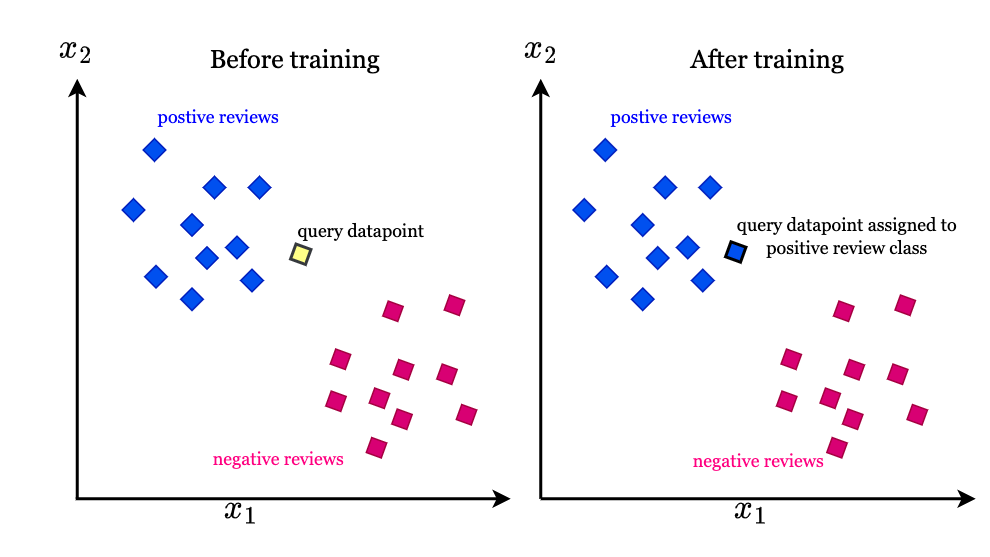

### Choosing a Distance Metric

Euclidean Distance: Best for continuous data and when all features are on similar scales.
$$
d(\mathbf{p}, \mathbf{q}) = \sqrt{\sum_{i=1}^n (q_i - p_i)^2}
$$

Manhattan Distance: Useful when differences along the axes are important, typically in grid-like data structures.
$$
d(\mathbf{p}, \mathbf{q}) = \sum_{i=1}^n |q_i - p_i|
$$

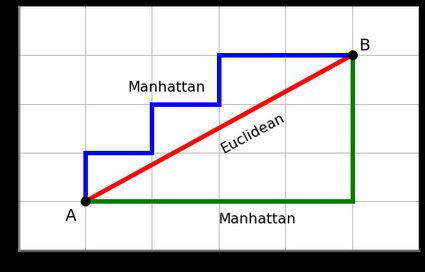

Hamming Distance: Measures the distance between two binary vectors, commonly used in scenarios where we need to compare binary attributes.




### Parameter Tuning: Selecting k

Selecting the right k is critical:

Small k: More sensitive to noise in the data, potentially leading to overfitting.
Large k: Smoother and more resilient to outliers, but might include points that are too far away, causing underfitting.

To choose the best k, you can experiment with different values and use techniques like cross-validation to see which k performs best.

### Advantages and Limitations
Advantages:

- Flexibility: Effective in scenarios where the decision boundary is irregular.
- No Assumption about Data: Works well with actual data distributions without requiring assumptions.


Limitations:

- Scalability: The need to store and make computations over the entire dataset makes KNN computationally expensive.
- Feature Scaling: Requires scaling since it relies on distances.
- Curse of Dimensionality: Performance degrades as the number of features increases.

To demonstrate KNN, we will be predicting binary classification on the Banknote Authentication Dataset ('Genuine' = 1, 'Forged' = 0)

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import sklearn as sk
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set_theme()

In [5]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
banknote_authentication = fetch_ucirepo(id=267) 
  
# data (as pandas dataframes) 
X = banknote_authentication.data.features 
y = banknote_authentication.data.targets 

y = y.values
y = y.ravel()

X = X[['variance', 'skewness']].values
scaler = StandardScaler()
X = scaler.fit_transform(X)

We will be making our model using 2 features, 'Variance' and 'Skewness'

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)

To select the right k-value, we will be doing cross-validation. What this entails is calculated the average Mean Squared Error (MSE) for k-values 1-15 on the dataset. We will then plot these values, and pick the k-value that has the lowest average MSE.
- Usually you pick the k-value that satisfies the 'Elbow Method', but as you will see our graph does not follow that pattern. Therefore, the point with the lowest MSE typically provides a good balance between overfitting and underfitting.

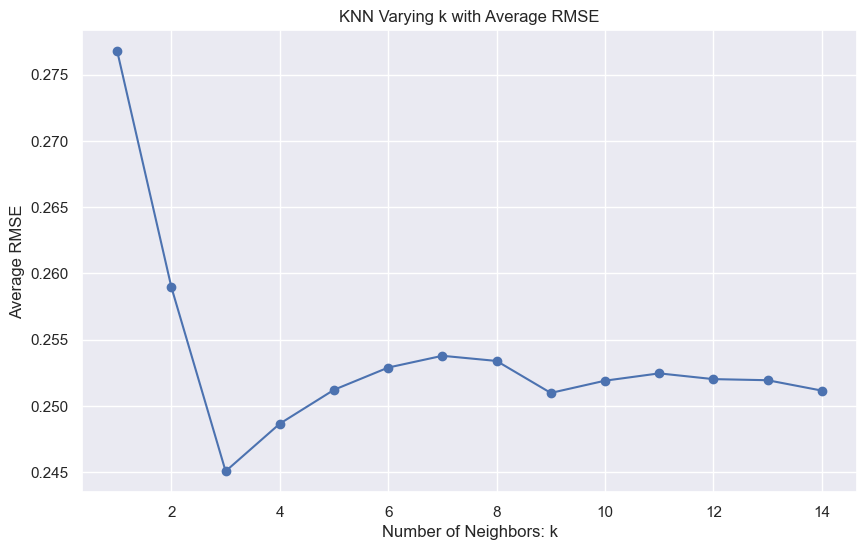

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
import numpy as np

# Array to store the average RMSE for each k
k_values = range(1, 15)  # Testing k from 1 to 20, for example
mean_rmse = []

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    # Perform 5-fold cross-validation
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    mean_rmse.append(np.mean(rmse_scores))

# Plotting the results to visualize the best k
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_rmse, marker='o')
plt.xlabel('Number of Neighbors: k')
plt.ylabel('Average RMSE')
plt.title('KNN Varying k with Average RMSE')
plt.grid(True)
plt.show()


Here, we see k = 3 minimizes the MSE. Therefore we will create our KNN model with 3 neighbors.

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score

# Calculate accuracy on training and test set
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test)


Training Accuracy: 0.9689018464528668
Test Accuracy: 0.9416909620991254


Here we can see our model is extremely accurate, maybe so much so that it is overfitting the data. Let's plot the predicted vs actual

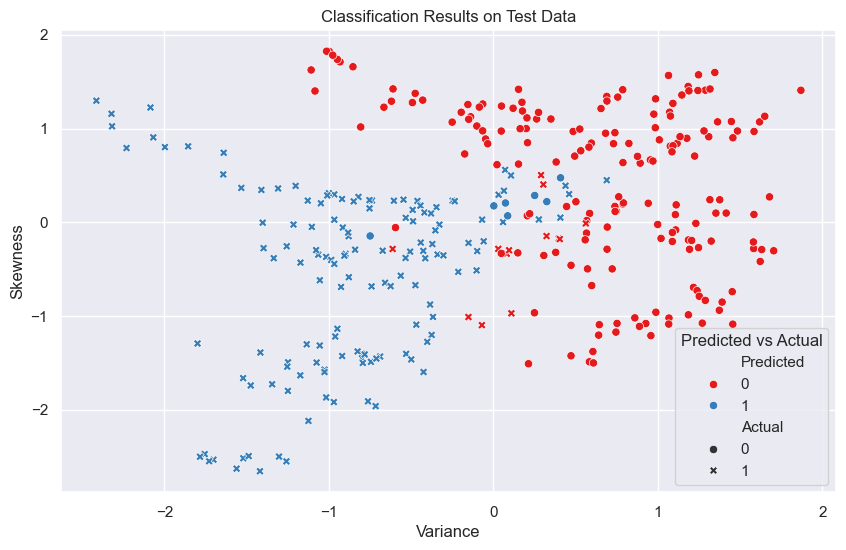

In [19]:
# Optionally, visualize the results
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a DataFrame for easier plotting
data_test = pd.DataFrame(X_test, columns=['Variance', 'Skewness'])
data_test['Predicted'] = y_pred_test
data_test['Actual'] = y_test

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_test, x='Variance', y='Skewness', hue='Predicted', style='Actual', palette='Set1', markers=['o', 'X'])
plt.title('Classification Results on Test Data')
plt.xlabel('Variance')
plt.ylabel('Skewness')
plt.legend(title='Predicted vs Actual')
plt.show()


We see a couple points where the prediction was incorrect, but overall the data looks very accurate. We can also see the start of decision boundaries between 'Genuine' and 'Forged'. Let's look at these boundaries through a better plot.

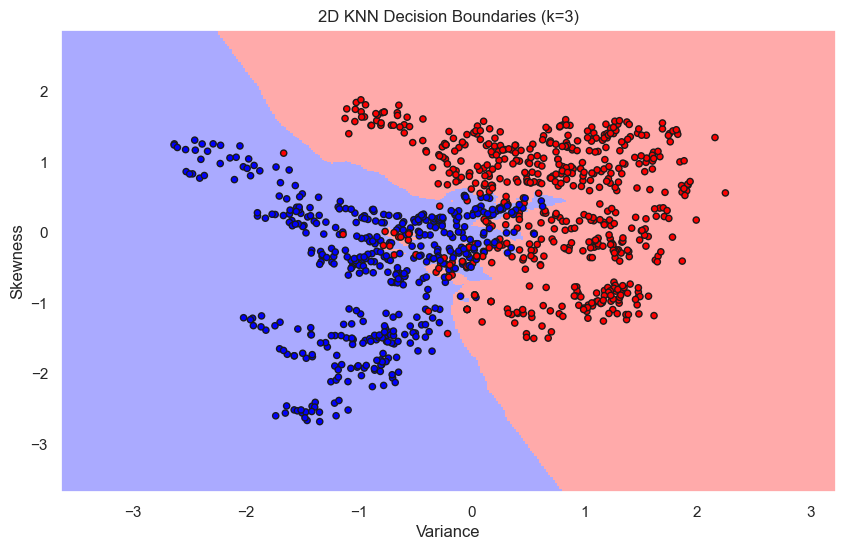

In [20]:
from matplotlib.colors import ListedColormap
# Create color maps for visualization
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

# Set up mesh grid (adjust the mesh size as needed)
h = 0.02  # step size in the mesh
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict class using data and KNN classifier
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 6))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2D KNN Decision Boundaries (k=3)")
plt.xlabel('Variance')
plt.ylabel('Skewness')

plt.show()

Excellent! We have run a successful KNN model where you can easily define decision boundaries based on the Variance-Skewness relationship. Onto the next model.